### 1. Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
 
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import f1_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve, precision_score, accuracy_score
#from sklearn.model_selection import cross_validate

### 2. Load the dataset

In [2]:
df = pd.read_csv("TelcomCustomer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Check the first few samples, shape, info of the data

In [3]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Lets check the shape of the dataset
df.shape

(7043, 21)

In [5]:
# Lets check few random samples
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5714,6108-OQZDQ,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.95,384.5,Yes
2930,5322-ZSMZY,Male,0,Yes,Yes,31,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,755.6,No
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
3257,5482-VXSXJ,Male,0,No,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.20,2157.3,No
6534,5195-KPUNQ,Female,1,No,No,53,Yes,No,Fiber optic,Yes,...,No,Yes,No,Yes,One year,Yes,Mailed check,96.75,5206.55,No
2976,4830-FAXFM,Male,0,No,Yes,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),24.10,439.2,No
4615,9499-XPZXM,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),64.75,4804.75,No
6222,0130-SXOUN,Male,0,No,No,66,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Credit card (automatic),89.40,5976.9,No
4632,4760-XOHVN,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,19.45,Yes
530,8067-NIOYM,Female,0,Yes,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),21.10,490.65,No


### 4. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any

In [6]:
# Checking missing values in each colunms
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- There are no missing values in the dataset.

### 5. Check if there are any duplicate records in the dataset? If any drop them

In [7]:
len(df[df.duplicated()])

0

- There are no duplicate records in the dataset.

### 6. Drop the columns which you think redundant for the analysis

In [8]:
## dropping redundant columns
df.drop(['customerID'],axis=1,inplace=True)

### 7. Encode the categorical variables

In [9]:
df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'],'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'],'No')
df['OnlineBackup'] = df['OnlineSecurity'].replace(['No internet service'],'No')
df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'],'No')
df['TechSupport'] = df['TechSupport'].replace(['No internet service'],'No')
df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'],'No')
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'],'No')
df['TotalCharges'] = df['TotalCharges'].replace([' '],0)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
Telco_df = df.copy()
Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].replace([0,1],['No','Yes'])

In [10]:
## Label Encoding categorical variables "Fuel_Type", "Seller_Type", and "Transmission" using label encoder

## select object datatype variables
object_type_variables = [i for i in df[["gender","Partner","Dependents","PhoneService","MultipleLines", 
                                        "InternetService","OnlineSecurity", "OnlineBackup","DeviceProtection",
                                        "TechSupport","StreamingTV","StreamingMovies","Contract",
                                        "PaperlessBilling","PaymentMethod"]] if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [11]:
df[["gender","Partner","Dependents","PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","InternetService","PaperlessBilling","PaymentMethod"]]

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,InternetService,PaperlessBilling,PaymentMethod
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,3
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,3
3,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,1,1,1,1,1,1,0,1,3
7039,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1
7040,0,1,1,0,0,1,1,0,0,0,0,0,0,1,2
7041,1,1,0,1,1,0,0,0,0,0,0,0,1,1,3


In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1,1,1,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,1,1,1,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


### 8. Perform a detailed univariate, bivariate, and multivariate analysis with appropriate plots and add detailed comments after each analysis.

### a) Univariate Analysis

#### Target Features (Churn Analysis)

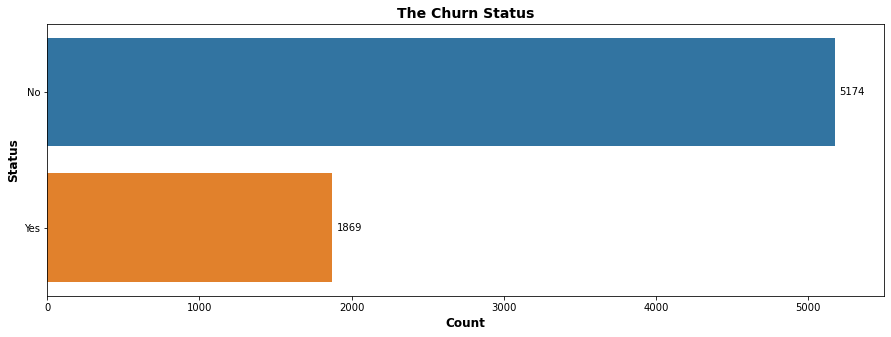

In [13]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = Telco_df,
                   y = 'Churn',
                   order = Telco_df['Churn'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f',padding=5)
ax.set_xlim(0,5500)
ax.set_title("The Churn Status", fontsize=14, weight='bold')
ax.set_xlabel('Count', fontsize=12, weight='bold')
ax.set_ylabel('Status', fontsize=12, weight='bold')
plt.show()

73.46301078796387
26.536986231803894


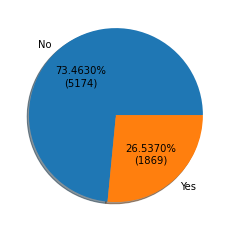

In [14]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)



status_counts = Telco_df['Churn'].value_counts()
total = len(Telco_df['Churn'])
fig = plt.figure()
plt.pie(status_counts, labels=status_counts.index, autopct=my_fmt, shadow=True);

##### Observations:
- Number of customers staying with the existing service provider is almost 3 times higher than the customers that gets churned

#### Categorical Features (Customer Profile)

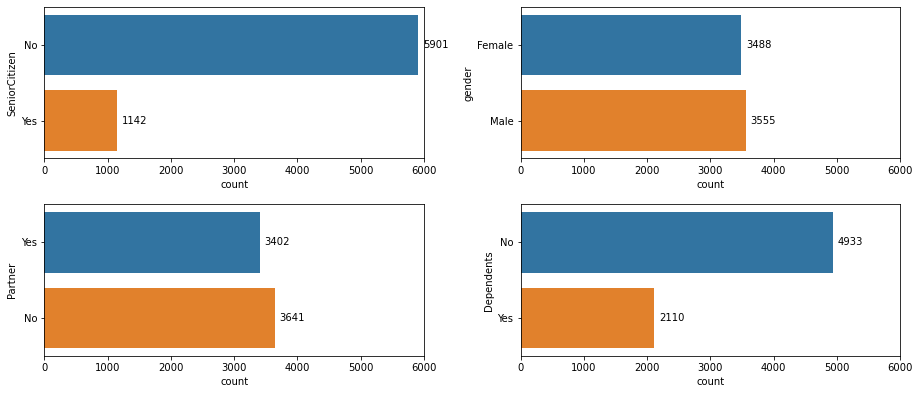

In [15]:
customer_profile = ['SeniorCitizen','gender','Partner','Dependents']

plt.figure(figsize=(13,8))
for i, col in enumerate(customer_profile):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=Telco_df, 
                       y= col)
    ax.set_xlim(0,6000)
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f',padding=5)
    plt.tight_layout(pad=1.5)

##### Observations:
- Number of Senior Citizens using Internet services are very less as compared to younger generation
- Customers with and without partner using internet services are almost equal
- Number of male and female customers using internet services are almost same
- Customers without Dependents uses internet services more than the customers with dependents

#### Categorical Features(Internet Services Profile)

In [16]:
### Categorical features in the dataset
categorical_features = Telco_df.drop(['SeniorCitizen','gender', 'Partner', 'Dependents', 'Churn'],axis=1).select_dtypes(include=[np.object])
categorical_features.columns

Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

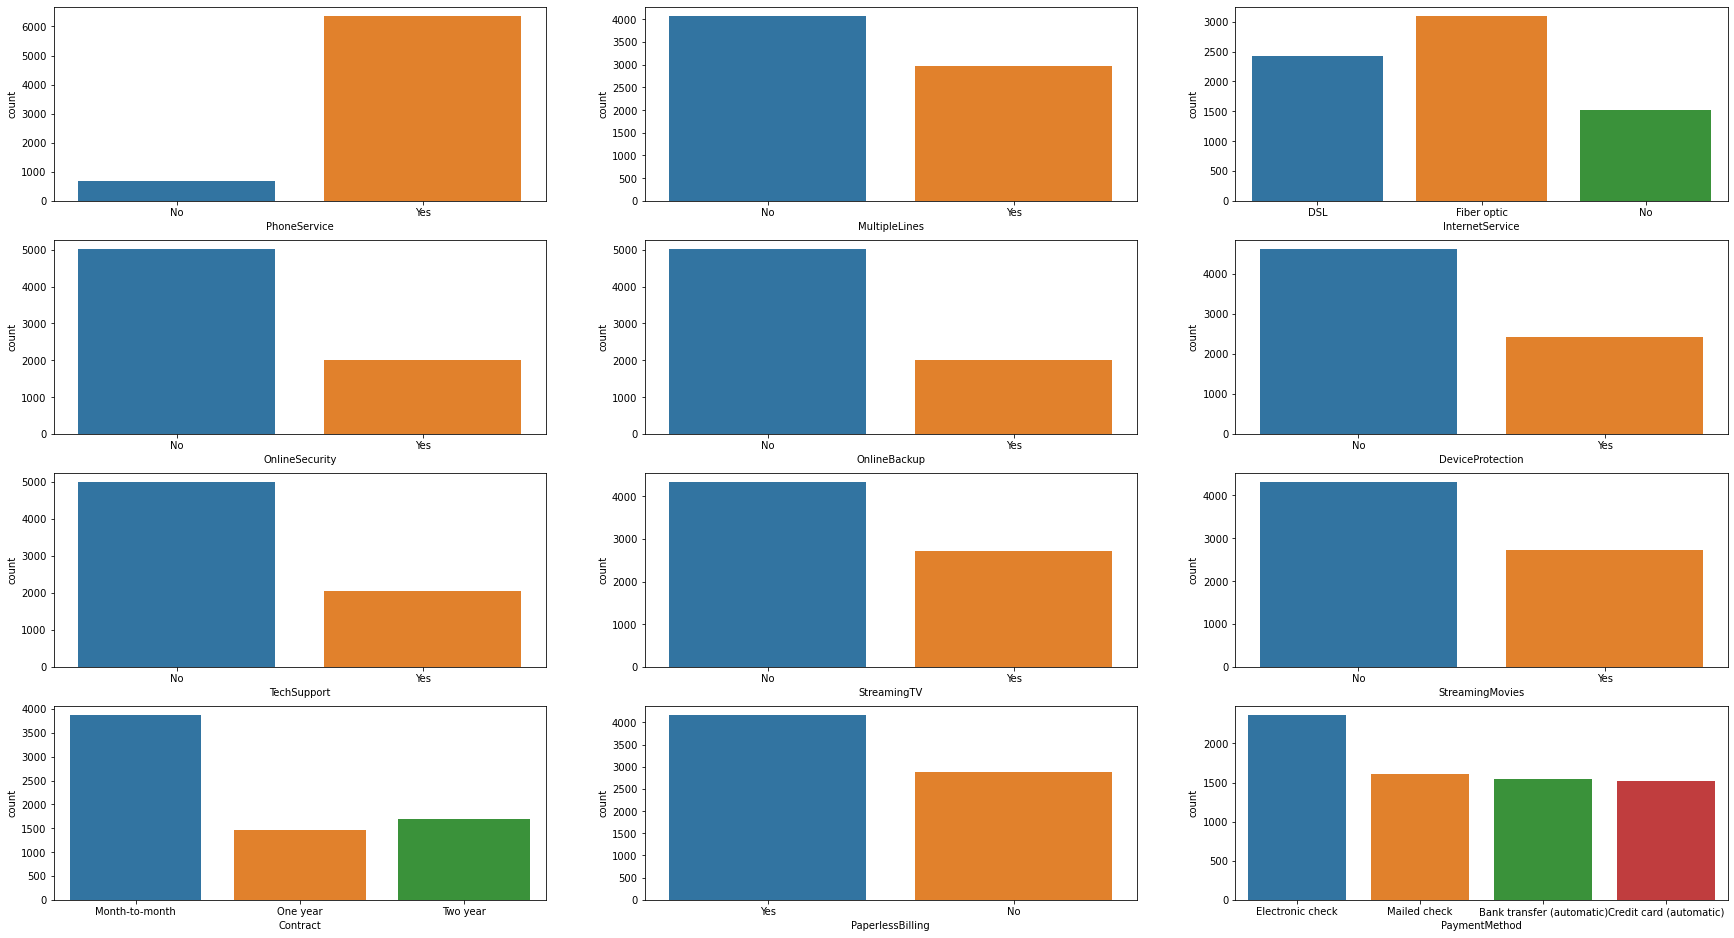

In [17]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = Telco_df)
    i +=1

##### Observations:

**Categorical features**
1. **contract type** - most people use the **month-to-month** plan rather than one-year or two years types. It seems that people don't like to be obligated for the long term. 
2. **billing type** - most of the customers don't use paper for the bill, but rather electronic means. The most popular billing method is **electronic check**.
3. **target variable** - the target variable is highly unbalanced, and we have a lot more users that didn't churn than users that churned (it is a good thing because if most of the users would have churned, then it would be profitable business). When we will train our models, we will balance the target variable in the **train set** to optimize the training process. 
4. **gender** - the 2 genders are equally balanced. 
5. **senior citizen** - most of the users are not senior citizens, which makes sense because most of the senior citizens don't use the internet and streaming services.
6. **partner** - the data here is balanced. 
7. **dependents** - most of the company users don't have dependents (maybe most of them don't have children).
8. **internet service** - most of the clients use the fibers instead of DSL - makes sense, it is much faster.
9. **online security, online backup, device protection, tech support** - most of the users don't purchase these services. 
10. **all the streaming services (tv and movies)** - these services are balanced among those who purchase them and those who don't.
11. **multiplelines** - most of the users don't purchase this service, although not much more than those who do. 

#### Numerical Features

In [18]:
countinous_features = ['tenure','MonthlyCharges','TotalCharges']

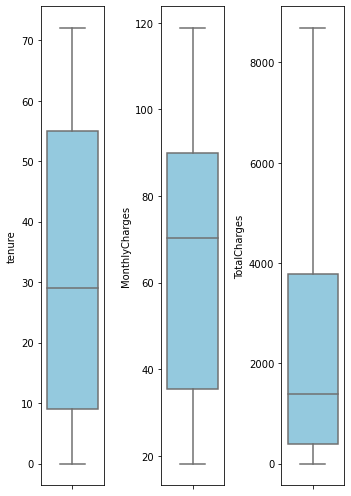

In [19]:
plt.figure(figsize=(15, 7))
for i in range(0, len(countinous_features)):
    plt.subplot(1, 9, i+1)
    sns.boxplot(y=countinous_features[i],data=Telco_df,color='skyblue')
    plt.tight_layout()

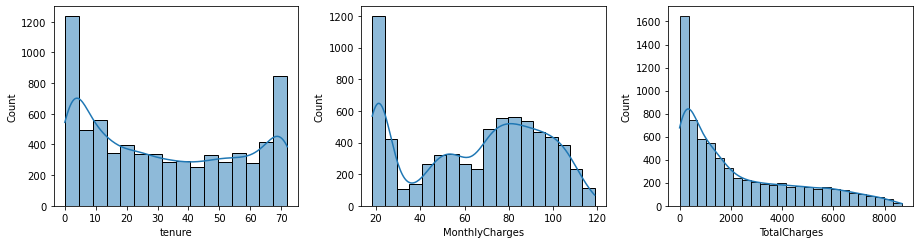

In [20]:
plt.figure(figsize=(13,10))
for i, col in enumerate(countinous_features):
    plt.subplot(3,3,i+1)
    sns.histplot(data=Telco_df, x= col, kde=True)
    plt.tight_layout(pad=1.5)

In [21]:
Telco_df[countinous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


### Numerical features

- On average, each customer pays around 70.5 each month.
- In total, the charges that the company gets from each customer are about 1,394.55
- The average time that a customer stays with the company is 29 Months, which is 2.4 years.

### b) Bivariate Analysis

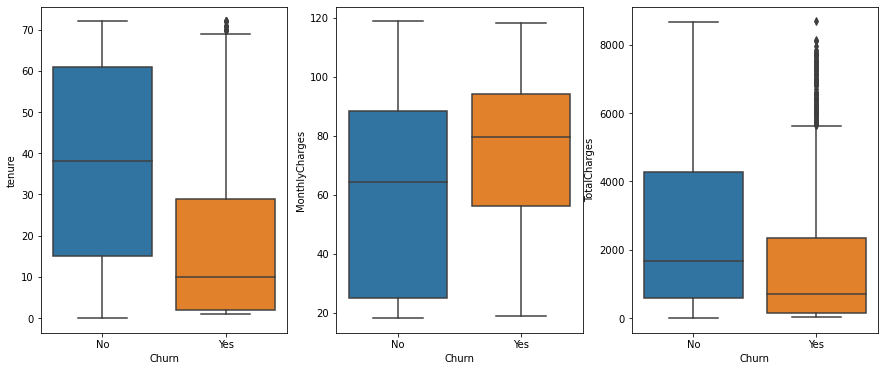

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x=Telco_df["Churn"], y=Telco_df["tenure"], data=Telco_df)
plt.subplot(1,3,2)
sns.boxplot(x=Telco_df["Churn"], y=Telco_df["MonthlyCharges"], data=Telco_df)
plt.subplot(1,3,3)
sns.boxplot(x=Telco_df["Churn"], y=Telco_df["TotalCharges"], data=Telco_df)
plt.show()

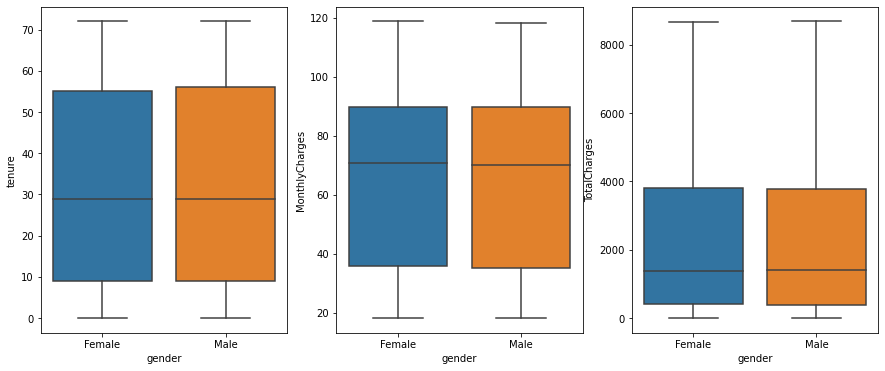

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x=Telco_df["gender"], y=Telco_df["tenure"], data=Telco_df)
plt.subplot(1,3,2)
sns.boxplot(x=Telco_df["gender"], y=Telco_df["MonthlyCharges"], data=Telco_df)
plt.subplot(1,3,3)
sns.boxplot(x=Telco_df["gender"], y=Telco_df["TotalCharges"], data=Telco_df)
plt.show()

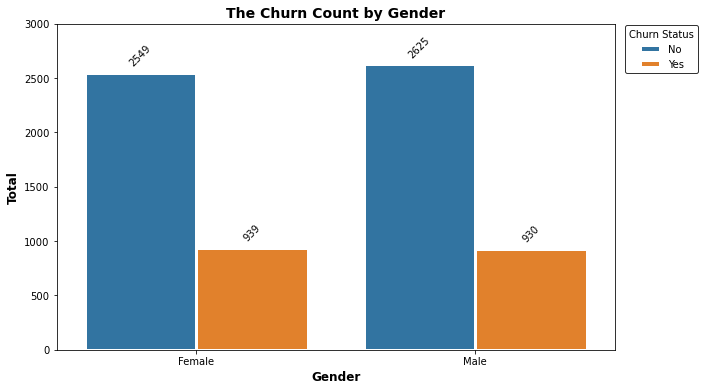

In [24]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=Telco_df,x='gender',hue='Churn',edgecolor='white',linewidth=3)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f', padding=5, label_type='edge', rotation=45)
ax.legend(title='Churn Status', bbox_to_anchor=(1.01,1.01), loc='upper left', edgecolor='black')
ax.set_title('The Churn Count by Gender',fontsize=14, weight= 'bold')
ax.set_ylabel('Total', fontsize=12, weight='bold')
ax.set_xlabel('Gender', fontsize=12, weight='bold')
plt.ylim(0,3000)
plt.show()

##### Observations:
- Churn Rate does not depends on Gender

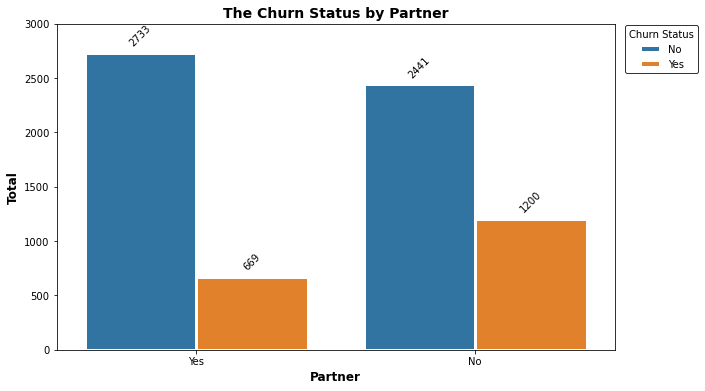

In [25]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=Telco_df,x='Partner',
                  hue='Churn',
                  edgecolor='white',linewidth=3)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f', padding=5, rotation=45)
ax.legend(title='Churn Status', bbox_to_anchor=(1.01,1.01), loc='upper left', edgecolor='black')
ax.set_title('The Churn Status by Partner',fontsize=14, weight= 'bold')
ax.set_ylabel('Total', fontsize=12, weight='bold')
ax.set_xlabel('Partner', fontsize=12, weight='bold')
plt.ylim(0,3000)
plt.show()

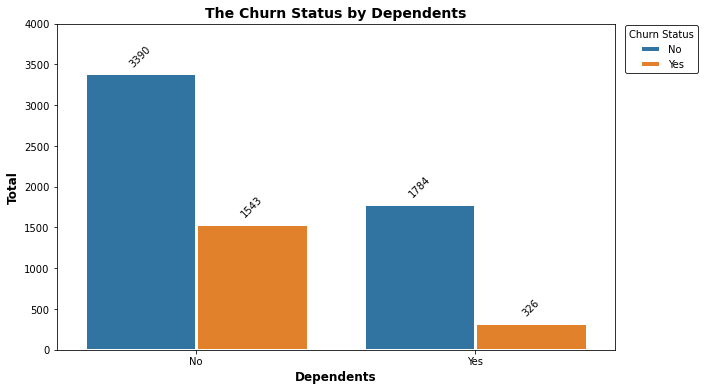

In [26]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=Telco_df,x='Dependents',
                  hue='Churn',
                  edgecolor='white',linewidth=3)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f', padding=5, rotation=45)
ax.legend(title='Churn Status', bbox_to_anchor=(1.01,1.01), loc='upper left', edgecolor='black')
ax.set_title('The Churn Status by Dependents',fontsize=14, weight= 'bold')
ax.set_ylabel('Total', fontsize=12, weight='bold')
ax.set_xlabel('Dependents', fontsize=12, weight='bold')
plt.ylim(0,4000)
plt.show()

##### Observations:
- Churn Rate is higher in customers with no dependents

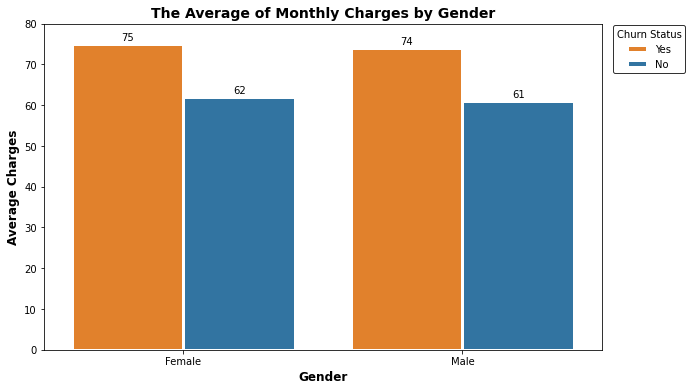

In [27]:
gender_total_charge = Telco_df.groupby(['gender', 'Churn']).agg(
                    {'MonthlyCharges':[('Avg_Charges','mean')]}).round(0)
gender_total_charge.columns = gender_total_charge.columns.droplevel()
gender_total_charge = gender_total_charge.sort_values('Avg_Charges', ascending=False).head(10)
gender_total_charge.reset_index(inplace=True)

plt.figure(figsize=(10,6))
ax= sns.barplot(data=gender_total_charge,
                  x='gender',
                  y='Avg_Charges',
                  hue='Churn',
                  palette=['tab:orange', 'tab:blue', 'tab:green'],
                  edgecolor='white',
                  linewidth=3)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f', padding=2)
ax.legend(title='Churn Status', bbox_to_anchor=(1.01,1.01), 
          loc='upper left', edgecolor='black')
ax.set_title('The Average of Monthly Charges by Gender',fontsize=14, weight='bold')
ax.set_xlabel('Gender', fontsize=12, weight='bold')
ax.set_ylabel('Average Charges', fontsize=12, weight='bold')
plt.ylim(0,80)
plt.show()

##### Observations:
- Churn rate highly depends upon the average monthly internet services charges

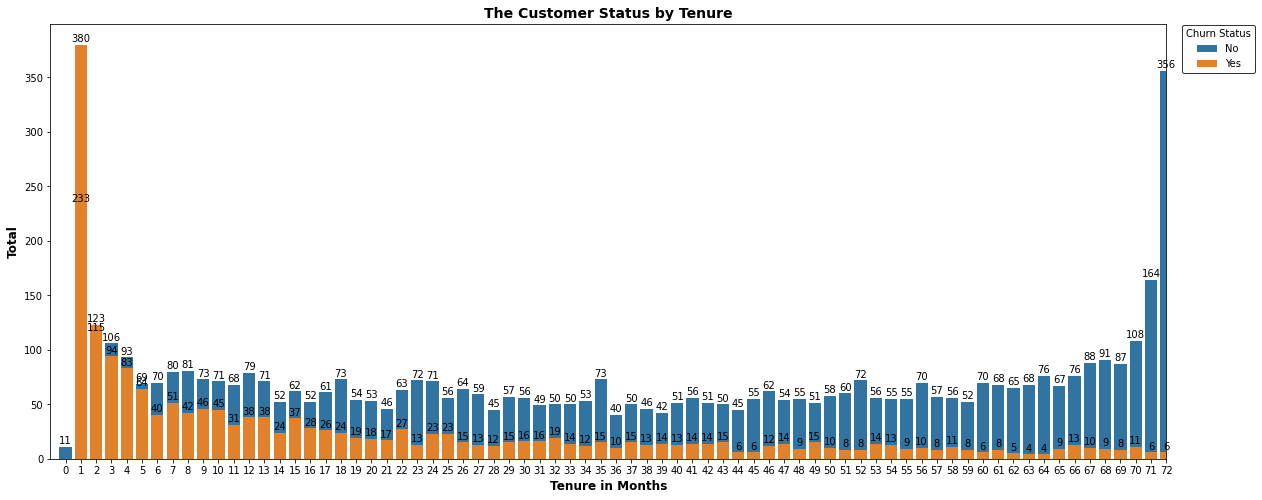

In [28]:
plt.figure(figsize=(20,8))
ax= sns.countplot(data=Telco_df,x='tenure', 
                  hue='Churn',
                  dodge=False)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f', padding=1, label_type='edge')
ax.legend(title='Churn Status', bbox_to_anchor=(1.01,1.01), loc='upper left', edgecolor='black')
ax.set_title('The Customer Status by Tenure',fontsize=14, weight= 'bold')
ax.set_xlabel('Tenure in Months', fontsize=12, weight='bold')
ax.set_ylabel('Total', fontsize=12, weight='bold')
ax.set_xlim(-1,72)
plt.show()

##### Observations:
- Churn rate is higher in new customers as compared to customers having tenure of over 20 months

In [29]:
#define function to check the count disctribution for categorical variable
def count_plot(data_frame, column_name, hue_in, index_i, index_j, ax):
    
    #based on hue input call diffent countplot:
    if (hue_in == ''):
        ax = sns.countplot(data=data_frame, x=column_name, ax = ax[index_i][index_j])
    else:
        ax = sns.countplot(data=data_frame, x=column_name, hue=hue_in, ax = ax[index_i][index_j])
        
    #This code will add percentage to each bar in  plot
    total = len(data_frame[column_name])    
    for p in ax.patches:    
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100* height/total),
            ha="center")
        ax.set_box_aspect(3/len(ax.patches))

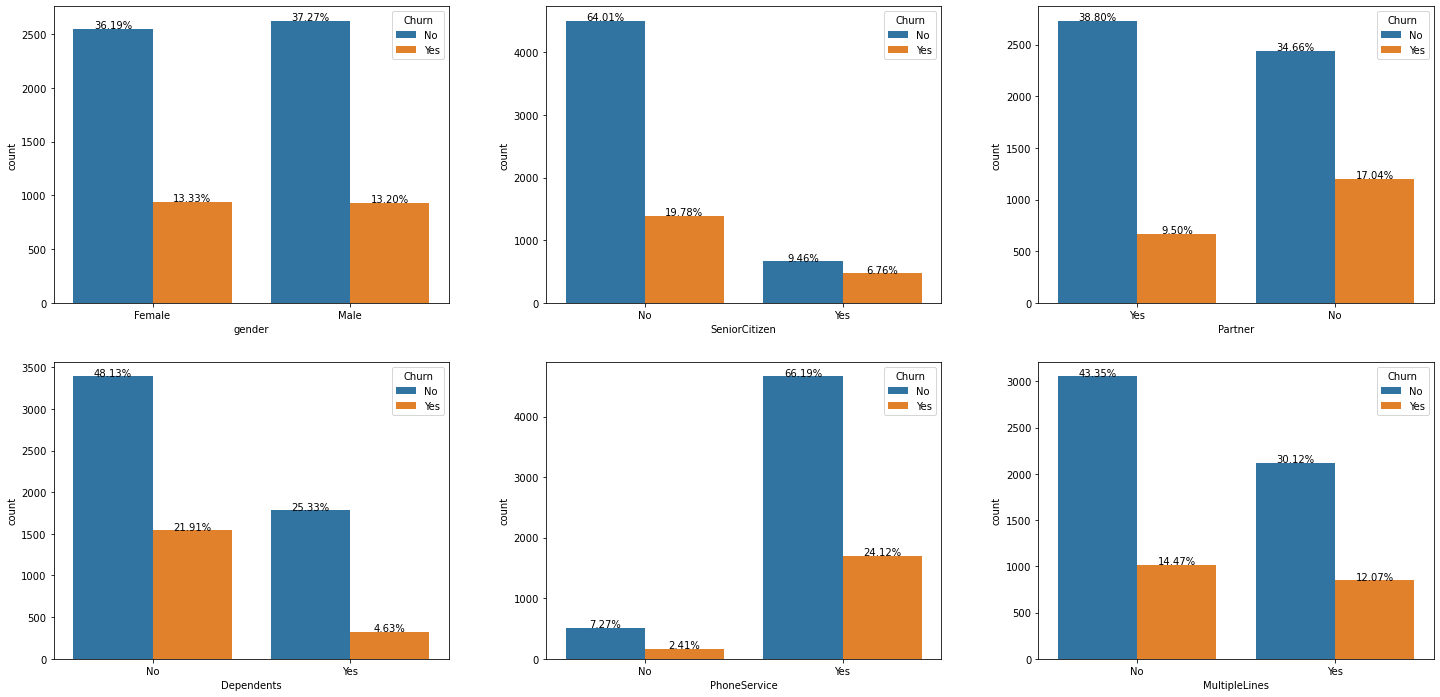

In [30]:
#call count_plot function with hue as 'Churn'
fig, ax = plt.subplots(2, 3, figsize= (25,12))
count_plot(Telco_df, 'gender','Churn', 0, 0, ax)
count_plot(Telco_df, 'SeniorCitizen','Churn', 0, 1, ax)
count_plot(Telco_df, 'Partner', 'Churn', 0, 2, ax)

count_plot(Telco_df, 'Dependents','Churn', 1, 0, ax)
count_plot(Telco_df, 'PhoneService','Churn',1, 1, ax)
count_plot(Telco_df, 'MultipleLines','Churn', 1, 2, ax)

### Observation:
- Gender data eqaually splipt among male and female. Nearly half of customer is male and half is female.
- 16% of customer are SeniorCitizen.So most of cutomer are younger.
- 48% customere have partner. Customer with no Partner is high compare to customer having patner.
- Custer with Dependents is very less (nearly 30%).
- Nearly 90% customer have PhoneService.
- Nearly 42% customer have MultipleLines service.

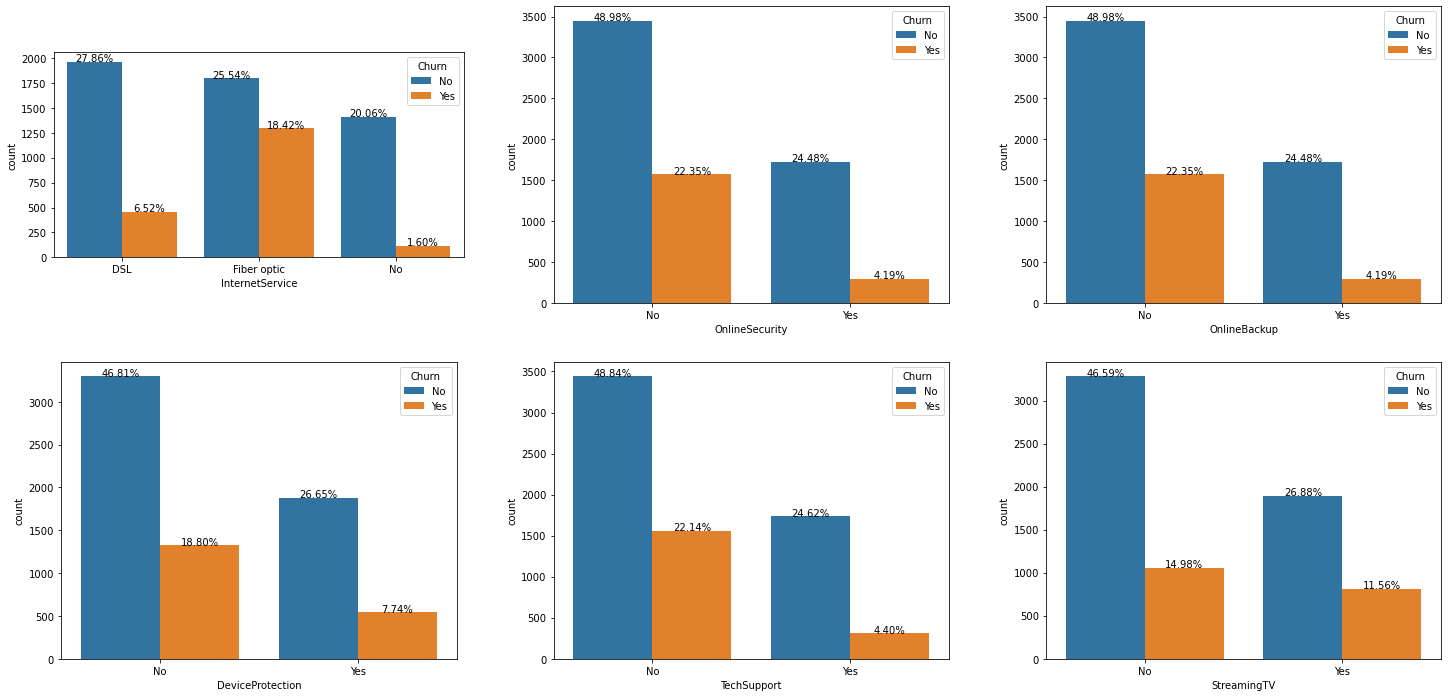

In [31]:
# distribution of categorical variable respect to "Churn"
fig, ax = plt.subplots(2, 3, figsize= (25, 12))
count_plot(Telco_df, 'InternetService','Churn', 0, 0, ax)
count_plot(Telco_df, 'OnlineSecurity','Churn',0, 1, ax)
count_plot(Telco_df, 'OnlineBackup','Churn', 0, 2, ax)

count_plot(Telco_df, 'DeviceProtection','Churn', 1, 0, ax)
count_plot(Telco_df, 'TechSupport','Churn',1, 1, ax)
count_plot(Telco_df, 'StreamingTV','Churn', 1, 2, ax)

### Observation:
- Customer with fiber optic internet service churn ratio is very high compare to DSL internet service.
- Customer without OnlineSecurity churn ratio is very high.
- Customer without OnlineBackup churn ratio is high compare to customer with Online Backup.
- Customer without DeviceProtection plan churn ratio is high compare to customer with DeviceProtection.
- Those Customer take no techSupport have high churn ratio.
- Customer which have streamingTV or not, on an average have same churn ratio.

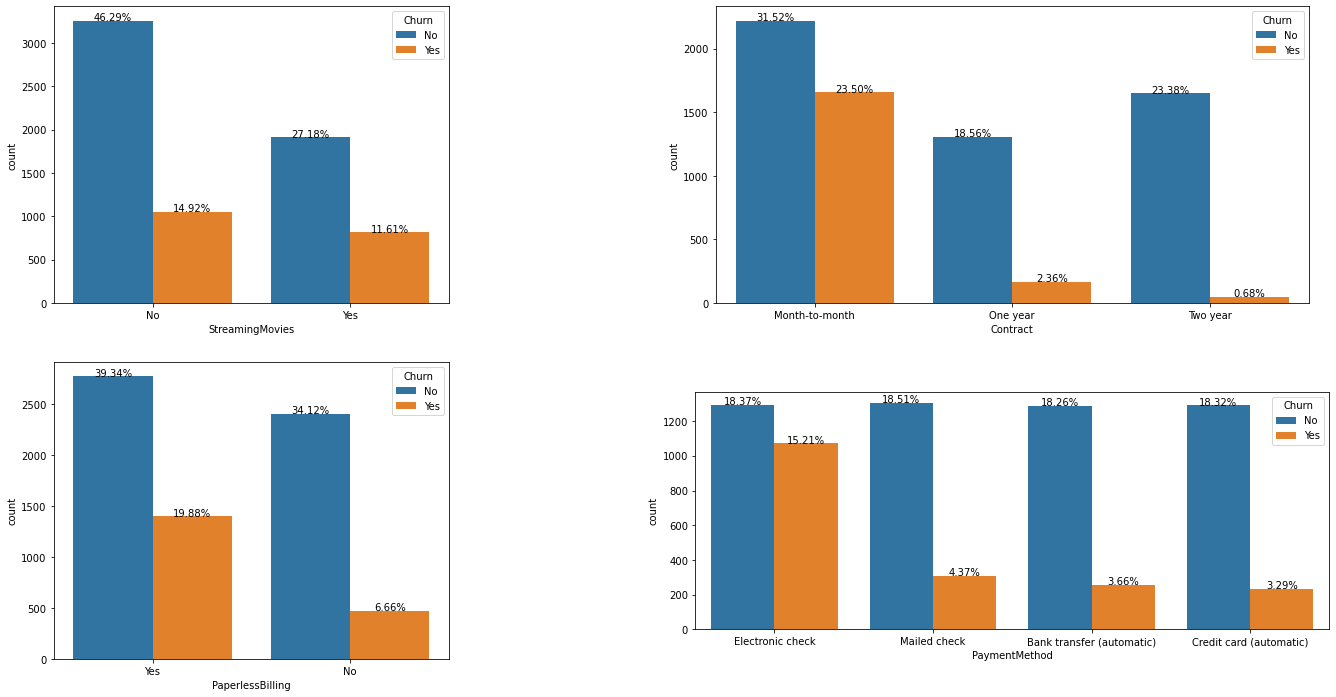

In [32]:
# distribution of categorical variable respect to "Churn"
fig, ax = plt.subplots(2, 2, figsize= (25, 12))
count_plot(Telco_df, 'StreamingMovies','Churn', 0, 0, ax)
count_plot(Telco_df, 'Contract','Churn',0, 1, ax)

count_plot(Telco_df, 'PaperlessBilling','Churn', 1, 0, ax)
count_plot(Telco_df, 'PaymentMethod','Churn', 1, 1, ax)

### Observation:
- Customer on Month-to-month contracts, have more churn ratio.
- Customer who opted papar bill have higher rate of churn.
- Automatic payments (Credit card, Bank transfer) show lower churn ratio.
- customer with Streaming Movie or not not  have nealry equal churn ratio.

### c) Check Multicolinearity

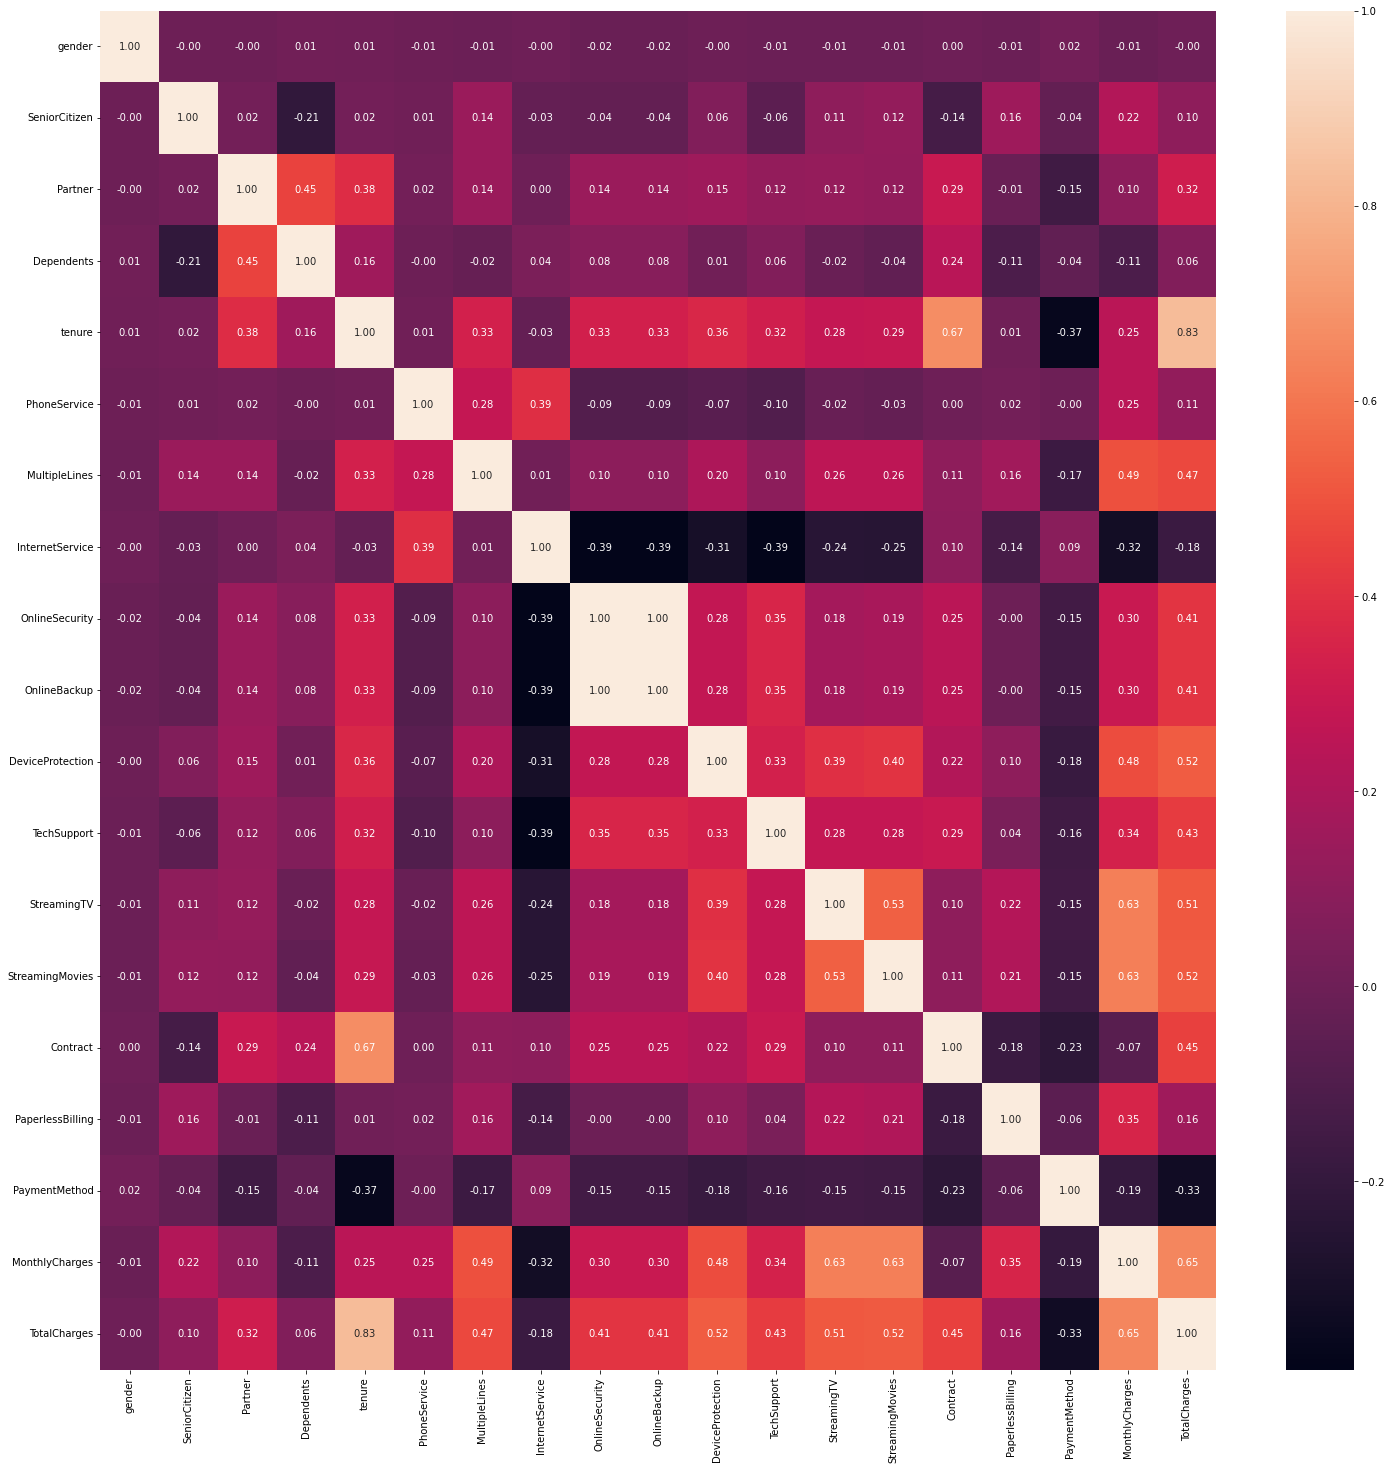

In [33]:
corr_ = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

### Observartion:
- Correlation matrix indicate "tenure" and "TotalCharges" have little high correlation.

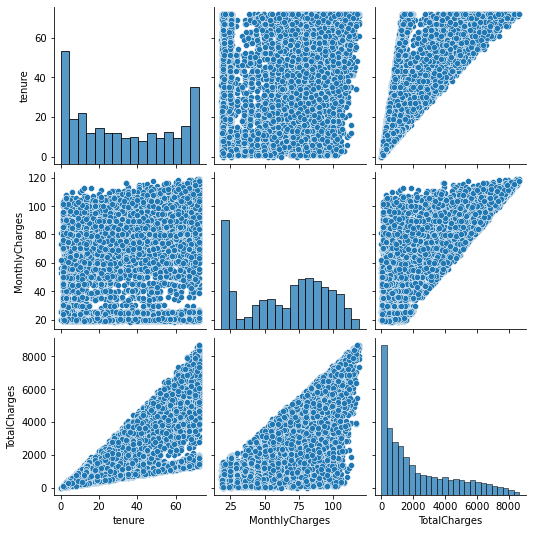

In [34]:
#pair plot for the continuous variables
sns.pairplot(data=Telco_df, x_vars=['tenure','MonthlyCharges','TotalCharges'],
            y_vars=['tenure','MonthlyCharges','TotalCharges'])

### Observation:
- **TotalCharges and tenure have high correlation.**
- **MonthlyCharges and TotalCharges have little correlation.**

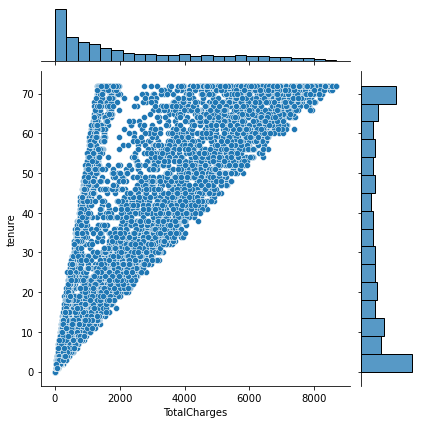

In [35]:
#joint plot for Totalchanges and tenure
sns.jointplot(data=Telco_df, x='TotalCharges', y='tenure')

- **Here we can see there is a correlation between thse two attributes.**

### 9. Data Preparation for model building

#### a. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable

In [36]:
# Lets store target column in variable y and the rest of the columns in variable X
# Standardize the columns using z-score scaling approach
import scipy.stats as stats
X = df.select_dtypes(include='number').apply(stats.zscore)
y = df['Churn'].replace(['No','Yes'],[0,1])

#### b. Split the dataset into two parts (i.e. 70% train and 30% test)

In [37]:
# Splitting the dataset in train set and test set of 70 to 30 ratio using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_train.shape)

(4930, 19) (2113, 19)
(4930,) (4930,)


In [38]:
# Lets check the scalled data
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,0.990532,-0.439916,-0.966622,-0.654012,-0.503758,0.327438,1.170719,-1.183234,-0.633933,-0.633933,-0.723968,1.563872,1.265612,-0.796070,0.371271,0.829798,0.398558,0.130893,-0.380977
4395,-1.009559,-0.439916,1.034530,1.529024,1.491540,0.327438,1.170719,0.172250,-0.633933,-0.633933,1.381277,-0.639439,1.265612,1.256171,-0.828207,0.829798,0.398558,1.302460,2.279665
1579,0.990532,2.273159,1.034530,-0.654012,-0.829521,0.327438,-0.854176,0.172250,-0.633933,-0.633933,-0.723968,-0.639439,-0.790132,1.256171,-0.828207,0.829798,0.398558,0.521416,-0.586568
1040,0.990532,2.273159,-0.966622,-0.654012,-0.748080,0.327438,-0.854176,0.172250,-0.633933,-0.633933,-0.723968,-0.639439,1.265612,1.256171,-0.828207,-1.205113,-0.537747,0.853775,-0.447198
1074,0.990532,-0.439916,-0.966622,-0.654012,-1.277445,0.327438,-0.854176,1.527734,-0.633933,-0.633933,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,-1.205113,1.334863,-1.451137,-0.996471


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [39]:
# Define one common funtion to impletment muliple model 
def model_evaluation(model_name, model, input_rel):    
    start = time.time()  # note the start time 
    model.fit(X_train, y_train)
    #prediction
    ypred = model.predict(X_test)
    
    #model name
    print(model_name)
    
    #confusion matrix
    print(confusion_matrix (y_test, ypred))
    
    #classifiction matrix
    #print(classification_report(y_test,ypred))
    
    trianing_score = model.score(X_train, y_train)
    acc_score = accuracy_score(y_test, ypred)
    
    recall = recall_score(y_test, ypred)
    precision = precision_score(y_test, ypred)
    f1 = f1_score(y_test,ypred)
    
    end = time.time()  #note the end time
    duration = end - start  # calculate the total duration
    
    #Store the accuracy results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Model_Name':[model_name], 'trianing_score': trianing_score, 
                              'accuracy': acc_score, 'precision': precision, 
                              'recall': recall, 'f1-score': f1, 'duration':duration })  
        
    resultsDf = pd.concat([input_rel, tempResultsDf])    
    resultsDf1 = resultsDf[['Model_Name', 'trianing_score', 'accuracy', 'precision', 'recall', 'f1-score', 'duration']]
    return resultsDf1

### 16. Use the function and train a Logistic regression, KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.

In [40]:
# Initializing the Models

nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)

In [41]:
#LogisticRegression model
resultsDf = pd.DataFrame()
lr = LogisticRegression() 
result_out = pd.DataFrame()
result_out = model_evaluation('LogisticRegression', lr, resultsDf)
result_out

LogisticRegression
[[1404  181]
 [ 228  300]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.11462


In [42]:
#KNN model
lr = LogisticRegression() 
result_out = model_evaluation('KNeighborsClassifier', knn, result_out)
result_out

KNeighborsClassifier
[[1322  263]
 [ 234  294]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159


In [43]:
#Naive Bayes model
lr = LogisticRegression() 
result_out = model_evaluation('GaussianNB', nb, result_out)
result_out

GaussianNB
[[1225  360]
 [ 128  400]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159
0,GaussianNB,0.747667,0.769049,0.526316,0.757576,0.621118,0.035594


In [44]:
#DecisionTreeClassifier model
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
result_out = model_evaluation('DecisionTreeClassifier', dt, result_out)
result_out

DecisionTreeClassifier
[[1254  331]
 [ 246  282]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159
0,GaussianNB,0.747667,0.769049,0.526316,0.757576,0.621118,0.035594
0,DecisionTreeClassifier,0.997972,0.726929,0.460033,0.534091,0.494303,0.078125


In [45]:
#RandomForestClassifier
rdcl = RandomForestClassifier(random_state=1)
result_out = model_evaluation('RandomForestClassifier', rdcl, result_out)
result_out

RandomForestClassifier
[[1409  176]
 [ 242  286]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159
0,GaussianNB,0.747667,0.769049,0.526316,0.757576,0.621118,0.035594
0,DecisionTreeClassifier,0.997972,0.726929,0.460033,0.534091,0.494303,0.078125
0,RandomForestClassifier,0.997972,0.802177,0.619048,0.541667,0.577778,1.365048


In [46]:
#AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=1)
result_out = model_evaluation('AdaBoostClassifier', abcl, result_out)
result_out

AdaBoostClassifier
[[1416  169]
 [ 224  304]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159
0,GaussianNB,0.747667,0.769049,0.526316,0.757576,0.621118,0.035594
0,DecisionTreeClassifier,0.997972,0.726929,0.460033,0.534091,0.494303,0.078125
0,RandomForestClassifier,0.997972,0.802177,0.619048,0.541667,0.577778,1.365048
0,AdaBoostClassifier,0.807302,0.814009,0.642706,0.575758,0.607393,0.613044


In [47]:
#GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
result_out = model_evaluation('GradientBoostingClassifier', gbcl, result_out)
result_out

GradientBoostingClassifier
[[1416  169]
 [ 236  292]]


,Model_Name,trianing_score,accuracy,precision,recall,f1-score,duration
0,LogisticRegression,0.801623,0.806436,0.623701,0.568182,0.594648,0.114620
0,KNeighborsClassifier,0.827586,0.764789,0.527828,0.556818,0.541935,2.206159
0,GaussianNB,0.747667,0.769049,0.526316,0.757576,0.621118,0.035594
0,DecisionTreeClassifier,0.997972,0.726929,0.460033,0.534091,0.494303,0.078125
0,RandomForestClassifier,0.997972,0.802177,0.619048,0.541667,0.577778,1.365048
0,AdaBoostClassifier,0.807302,0.814009,0.642706,0.575758,0.607393,0.613044
0,GradientBoostingClassifier,0.820487,0.808329,0.633406,0.553030,0.590495,1.758572


### Conclusion

- Ada Boost is the best fit Model with an accuracy of 81.4%
- Decision Tree and Random Forest models are overfit.
- LogisticRegression also did well. Accuracy is little less than Ada Boost but the training and tesing score look balanced and execution time is very less.